# Student Admission Data

# AIM
* The aim of this project is to perform Exploratory Data Analysis (EDA) on the student admissions dataset.
* Build a machine learning model to predict whether a student will be admitted based on academic scores, experience, and profile attributes.

# The dataset consists of 53,644 rows and 26 column variables.Each row represents a student profile submitted for university admission.

# important Libraries Needed

In [472]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from six import StringIO
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA

In [473]:
pd.read_csv(r"C:\Users\Administrator\Documents\Datamites CDS\vijaySir\original_data.csv")

userName                          major  researchExp  industryExp  \
0             143saf            Systems and Control            0           18   
1         7790ashish      Manufacturing Engineering            0            0   
2               AB25     (MIS / MSIM / MSIS / MSIT)            0           66   
3           abhijitg                            NaN            0            0   
4        abhijitgang                            MIS            0            0   
...              ...                            ...          ...          ...   
53639         zapp11         Mechanical Engineering            0           24   
53640      zathurian  Electronics and Communication            0            0   
53641      zeal_vyas         Electrical Engineering            0            0   
53642  zidanefaraday         Electrical Engineering            0            0   
53643       zohaib16         Electrical Engineering            0            0   

                             specialization  toeflScore program  \
0                                  Robotics       112.0      MS   
1                                       NaN         NaN      MS   
2                                       NaN        94.0      MS   
3                                       NaN         NaN     NaN   
4                                       NaN        81.0      MS   
...                                     ...         ...     ...   
53639                      Thermal Sciences        98.0      MS   
53640                         Communication       115.0      MS   
53641  Computer Networks/Telecommunications         NaN      MS   
53642       Power System Electric Machinery        99.0      MS   
53643                                   NaN       104.0      MS   

                                              department toeflEssay  \
0                              Instrumentation & Control         26   
1                                                      0        NaN   
2                                   Computer Engineering         21   
3                                                      0        NaN   
4                                               computer        NaN   
...                                                  ...        ...   
53639                             Production Engineering         24   
53640          Electronics and Communication Engineering         30   
53641                  Electronics and Telecommunication        NaN   
53642  University Institute of Engineering and Techno...        NaN   
53643                                        Electronics        NaN   

       internExp  ...  termAndYear  confPubs                    ugCollege  \
0            5.0  ...  Fall - 2015         0  Dharamsinh Desai University   
1            0.0  ...  Fall - 2013         0                          NaN   
2            0.0  ...  Fall - 2015         0                     IET DAVV   
3            0.0  ...          NaN       NaN                          NaN   
4            0.0  ...  Fall - 2011         0              Pune University   
...          ...  ...          ...       ...                          ...   
53639       12.0  ...  Fall - 2014         0         University of Mumbai   
53640        0.0  ...  Fall - 2012         0               BITS Hyderabad   
53641        0.0  ...  Fall - 2013         0                        NMIMS   
53642        0.0  ...  Fall - 2011         0            Panjab University   
53643        0.0  ...  Fall - 2011         0              Univ. of Mumbai   

      gmatA   cgpa  gmatQ cgpaScale gmatV                         univName  \
0       NaN   8.50    NaN        10   NaN  Worcester Polytechnic Institute   
1       NaN   0.00    NaN         0   NaN  Worcester Polytechnic Institute   
2       NaN  78.28    NaN       100   NaN  Worcester Polytechnic Institute   
3       NaN   0.00    NaN         0   NaN  Worcester Polytechnic Institute   
4       NaN  57.00    NaN       100   NaN  Worcester Polytechnic I

In [474]:
order = pd.read_csv(r"C:\Users\Administrator\Documents\Datamites CDS\vijaySir\original_data.csv")

# Data Analysis

In [475]:
order.isnull().sum()[order.isnull().sum()>0]

major               387
specialization    21695
toeflScore         4414
program             322
department            1
toeflEssay        41770
internExp            14
greV               1256
greQ               1220
journalPubs         322
greA               2858
topperCgpa            3
termAndYear         322
confPubs            322
ugCollege          2278
gmatA             53525
gmatQ             53521
gmatV             53530
dtype: int64

In [476]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userName         53644 non-null  object 
 1   major            53257 non-null  object 
 2   researchExp      53644 non-null  int64  
 3   industryExp      53644 non-null  int64  
 4   specialization   31949 non-null  object 
 5   toeflScore       49230 non-null  float64
 6   program          53322 non-null  object 
 7   department       53643 non-null  object 
 8   toeflEssay       11874 non-null  object 
 9   internExp        53630 non-null  float64
 10  greV             52388 non-null  float64
 11  greQ             52424 non-null  float64
 12  userProfileLink  53644 non-null  object 
 13  journalPubs      53322 non-null  object 
 14  greA             50786 non-null  float64
 15  topperCgpa       53641 non-null  float64
 16  termAndYear      53322 non-null  object 
 17  confPubs    

In [477]:
order.major.fillna(order['major'].mode()[0], inplace = True)
order.specialization.fillna(order["specialization"].mode()[0], inplace = True)
order.toeflScore.fillna(order["toeflScore"].mean(), inplace = True)
order.program.fillna(order["program"].mode()[0], inplace = True)
order.department.fillna(order["department"].mode()[0], inplace = True)
order.greV.fillna(order["greV"].mean(), inplace = True)
order.greQ.fillna(order["greQ"].mean(), inplace = True)
order.journalPubs.fillna(order["journalPubs"].mode()[0], inplace = True)
order.greA.fillna(order["greA"].mean(), inplace = True)
order.topperCgpa.fillna(order["topperCgpa"].mean(), inplace = True)
order.termAndYear.fillna(order["termAndYear"].mode()[0], inplace = True)
order.confPubs.fillna(order["confPubs"].mode()[0], inplace = True)
order.ugCollege.fillna(order["ugCollege"].mode()[0], inplace = True)
order.gmatA.fillna(order["gmatA"].mean(), inplace = True)
order.gmatQ.fillna(order["gmatQ"].mean(), inplace = True)
order.gmatV.fillna(order["gmatV"].mean(), inplace = True)
order.internExp.fillna(order["internExp"].mean(), inplace = True)

In [478]:
order

userName                          major  researchExp  industryExp  \
0             143saf            Systems and Control            0           18   
1         7790ashish      Manufacturing Engineering            0            0   
2               AB25     (MIS / MSIM / MSIS / MSIT)            0           66   
3           abhijitg               Computer Science            0            0   
4        abhijitgang                            MIS            0            0   
...              ...                            ...          ...          ...   
53639         zapp11         Mechanical Engineering            0           24   
53640      zathurian  Electronics and Communication            0            0   
53641      zeal_vyas         Electrical Engineering            0            0   
53642  zidanefaraday         Electrical Engineering            0            0   
53643       zohaib16         Electrical Engineering            0            0   

                             specialization  toeflScore program  \
0                                  Robotics  112.000000      MS   
1                                      VLSI  109.558826      MS   
2                                      VLSI   94.000000      MS   
3                                      VLSI  109.558826      MS   
4                                      VLSI   81.000000      MS   
...                                     ...         ...     ...   
53639                      Thermal Sciences   98.000000      MS   
53640                         Communication  115.000000      MS   
53641  Computer Networks/Telecommunications  109.558826      MS   
53642       Power System Electric Machinery   99.000000      MS   
53643                                  VLSI  104.000000      MS   

                                              department toeflEssay  \
0                              Instrumentation & Control         26   
1                                                      0        NaN   
2                                   Computer Engineering         21   
3                                                      0        NaN   
4                                               computer        NaN   
...                                                  ...        ...   
53639                             Production Engineering         24   
53640          Electronics and Communication Engineering         30   
53641                  Electronics and Telecommunication        NaN   
53642  University Institute of Engineering and Techno...        NaN   
53643                                        Electronics        NaN   

       internExp  ...  termAndYear  confPubs                    ugCollege  \
0            5.0  ...  Fall - 2015         0  Dharamsinh Desai University   
1            0.0  ...  Fall - 2013         0                           MU   
2            0.0  ...  Fall - 2015         0                     IET DAVV   
3            0.0  ...  Fall - 2013         0                           MU   
4            0.0  ...  Fall - 2011         0              Pune University   
...          ...  ...          ...       ...                          ...   
53639       12.0  ...  Fall - 2014         0         University of Mumbai   
53640        0.0  ...  Fall - 2012         0               BITS Hyderabad   
53641        0.0  ...  Fall - 2013         0                        NMIMS   
53642        0.0  ...  Fall - 2011         0            Panjab University   
53643        0.0  ...  Fall - 2011         0              Univ. of Mumbai   

          gmatA   cgpa      gmatQ cgpaScale      gmatV  \
0      6.117647   8.50  49.325203        10  34.885965   
1      6.117647   0.00  49.325203         0  34.885965   
2      6.117647  78.28  49.325203       100  34.885965   
3      6.117647   0.00  49.325203         0  34.885965   
4      6.117647  57.00  49.325203       100  34.885965   
...         ...    ...        ...       ...        ...   
53639  6.117647  71.00  49.325203       100  34.88

In [479]:
# using Label Encoder to convert text data into numeric data
le = LabelEncoder()

In [480]:
order[order.select_dtypes(include='object').columns] = order[order.select_dtypes(include='object').columns].apply(le.fit_transform)

In [481]:
order

userName  major  researchExp  industryExp  specialization  toeflScore  \
0            28    196            0           18            2473  112.000000   
1            57    151            0            0            2926  109.558826   
2            71      0            0           66            2926   94.000000   
3          2312     56            0            0            2926  109.558826   
4          2313    137            0            0            2926   81.000000   
...         ...    ...          ...          ...             ...         ...   
53639     14760    165            0           24            2856   98.000000   
53640     14763     89            0            0             498  115.000000   
53641     14765     77            0            0             699  109.558826   
53642     14781     77            0            0            2322   99.000000   
53643     14786     77            0            0            2926  104.000000   

       program  department  toeflEssay  internExp  ...  termAndYear  confPubs  \
0            1         998          15        5.0  ...           26         0   
1            1           1          36        0.0  ...           22         0   
2            1         292          10        0.0  ...           26         0   
3            1           1          36        0.0  ...           22         0   
4            1        1343          36        0.0  ...           18         0   
...        ...         ...         ...        ...  ...          ...       ...   
53639        1        1236          13       12.0  ...           25         0   
53640        1         741          21        0.0  ...           20         0   
53641        1         793          36        0.0  ...           22         0   
53642        1        1306          36        0.0  ...           18         0   
53643        1         636          36        0.0  ...           18         0   

       ugCollege     gmatA   cgpa      gmatQ  cgpaScale      gmatV  univName  \
0            269  6.117647   8.50  49.325203         10  34.885965        53   
1            871  6.117647   0.00  49.325203          0  34.885965        53   
2            511  6.117647  78.28  49.325203        100  34.885965        53   
3            871  6.117647   0.00  49.325203          0  34.885965        53   
4           1151  6.117647  57.00  49.325203        100  34.885965        53   
...          ...       ...    ...        ...        ...        ...       ...   
53639       1624  6.117647  71.00  49.325203        100  34.885965         0   
53640         98  6.117647   6.50  49.325203         10  34.885965         0   
53641       1014  6.117647   3.55  49.325203          4  34.885965         0   
53642       1132  6.117647  70.50  49.325203        100  34.885965         0   
53643       1576  6.117647  61.00  49.325203        100  34.885965         0   

       admit  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
53639      0  
53640      0  
53641      0  
53642      0  
53643      0  

[53644 rows x 26 columns]

In [482]:
order.isnull().sum()

userName           0
major              0
researchExp        0
industryExp        0
specialization     0
toeflScore         0
program            0
department         0
toeflEssay         0
internExp          0
greV               0
greQ               0
userProfileLink    0
journalPubs        0
greA               0
topperCgpa         0
termAndYear        0
confPubs           0
ugCollege          0
gmatA              0
cgpa               0
gmatQ              0
cgpaScale          0
gmatV              0
univName           0
admit              0
dtype: int64

# Exploratory Data Analysis

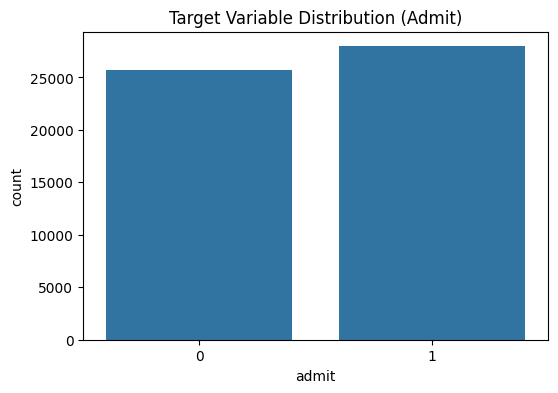


Admit value counts:
admit
1    27955
0    25689
Name: count, dtype: int64


In [483]:
# TARGET VARIABLE (admit)

plt.figure(figsize=(6,4))
sns.countplot(x=order['admit'])
plt.title("Target Variable Distribution (Admit)")
plt.show()
print("\nAdmit value counts:")
print(order['admit'].value_counts())

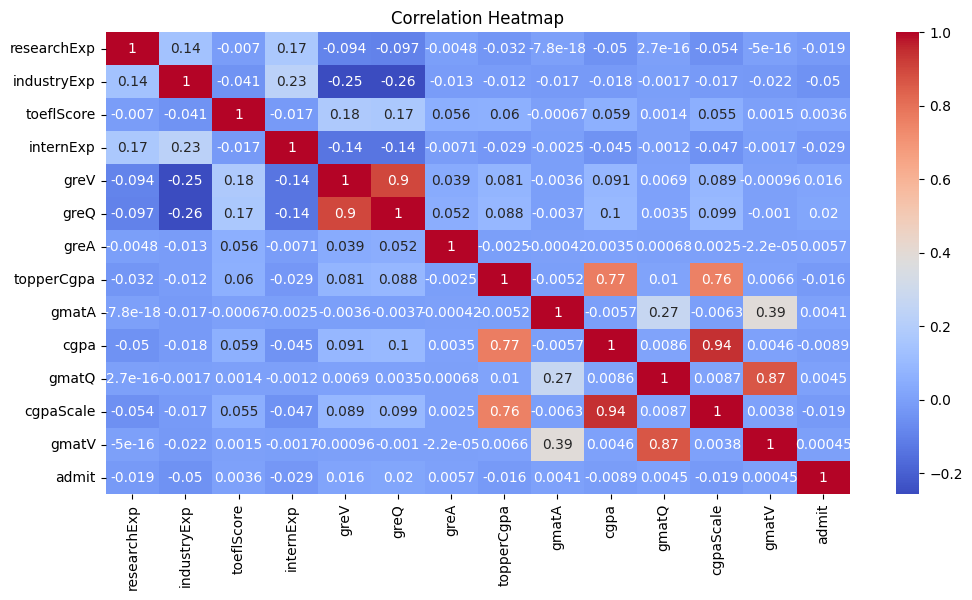

In [484]:
# CORRELATION HEATMAP

plt.figure(figsize=(12,6))
sns.heatmap(order[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

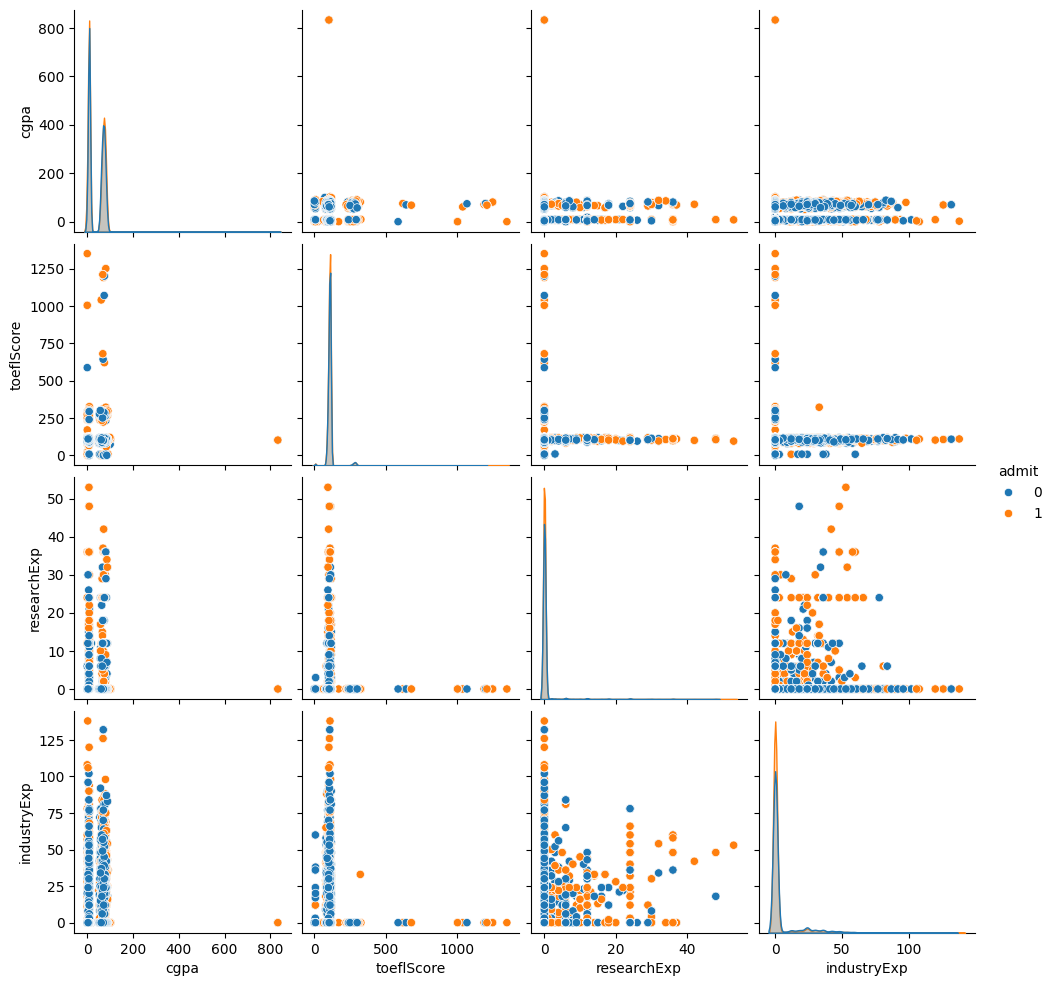

In [485]:
# PAIRPLOT FOR KEY FEATURES

selected_cols = ['cgpa', 'toeflScore', 'researchExp', 'industryExp', 'admit']

sns.pairplot(order[selected_cols], hue="admit")
plt.show()

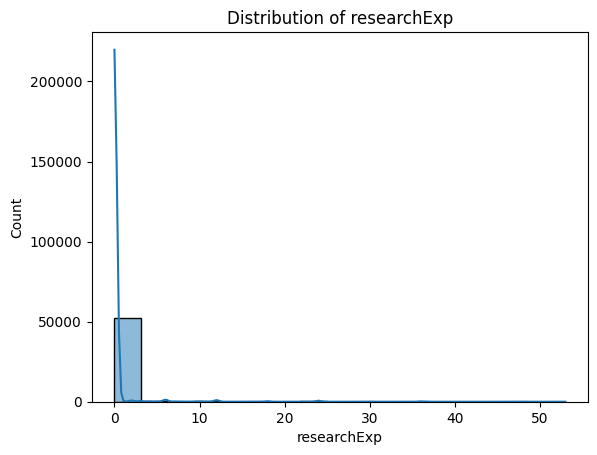

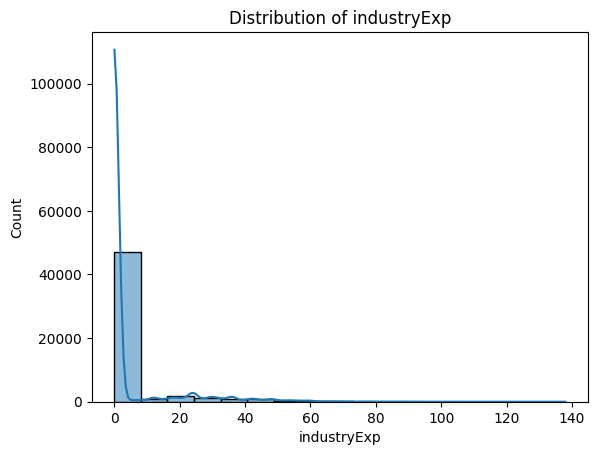

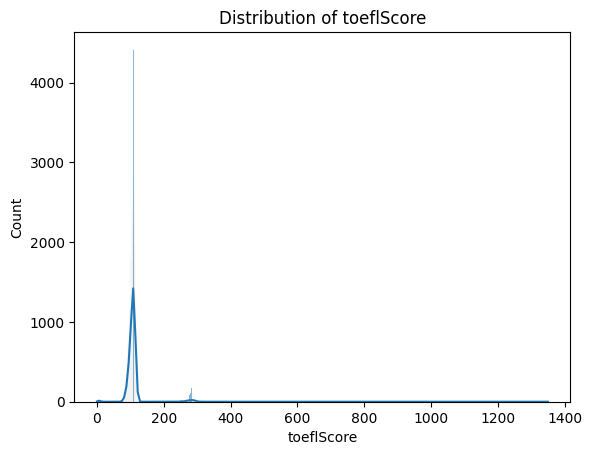

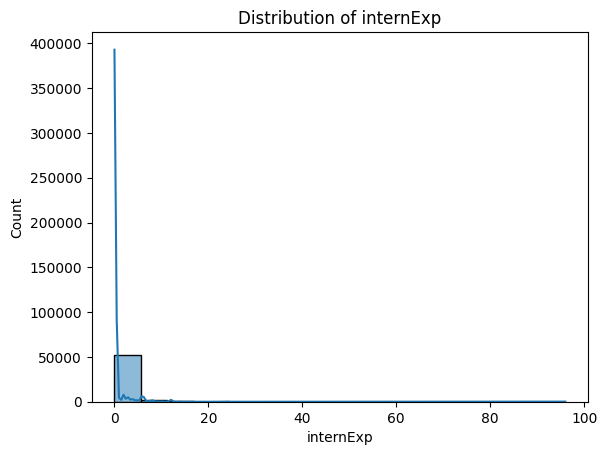

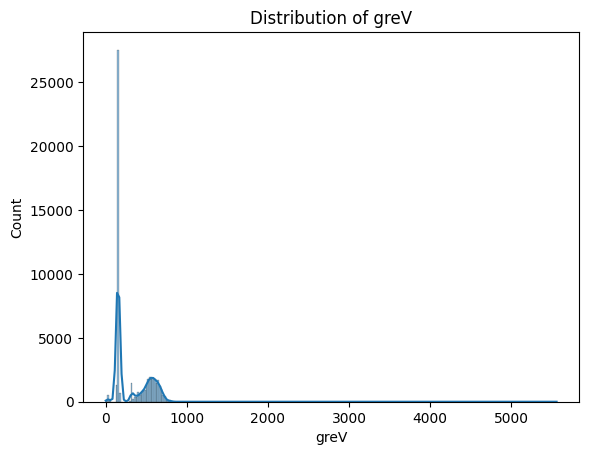

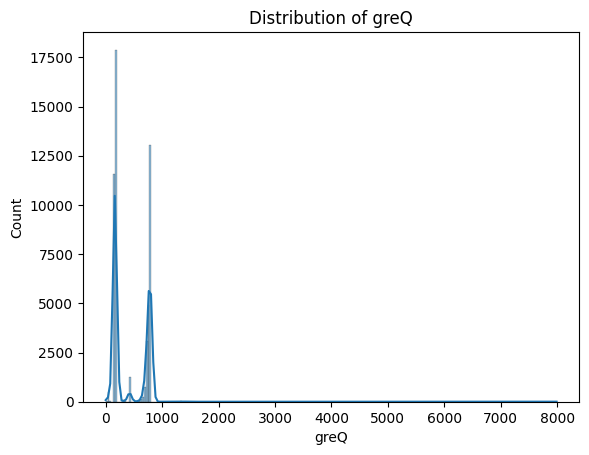

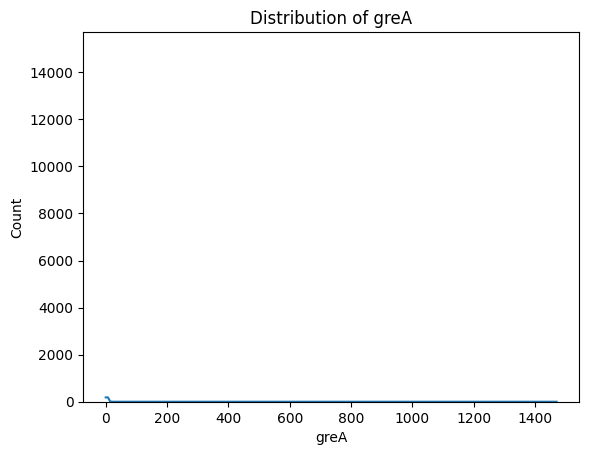

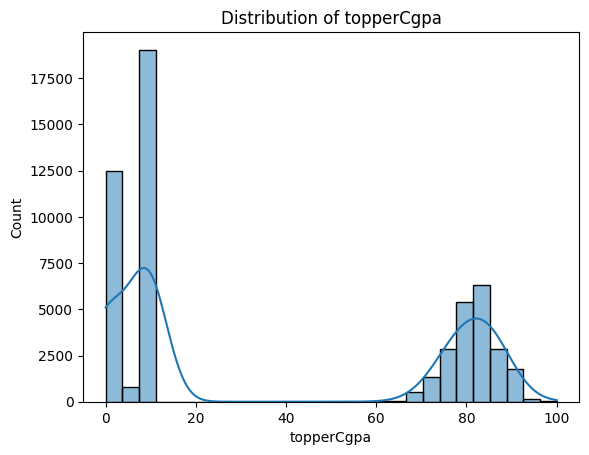

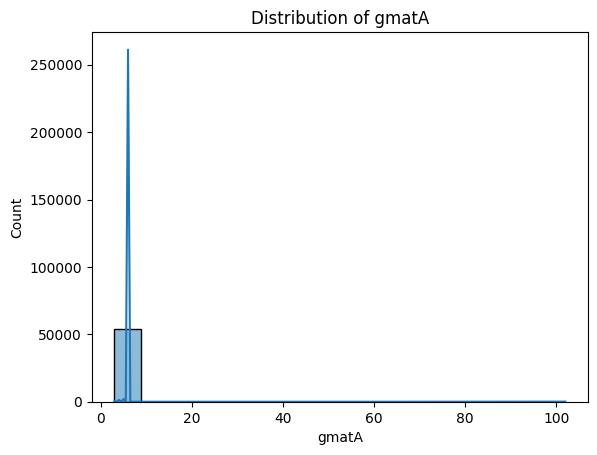

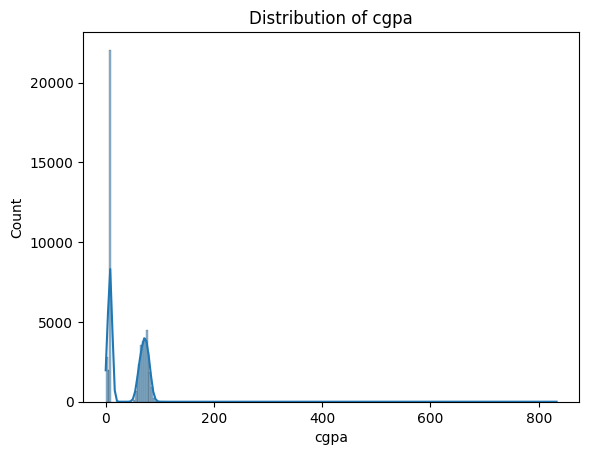

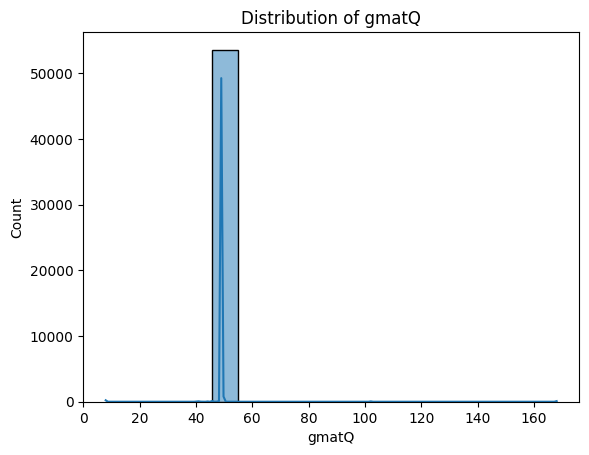

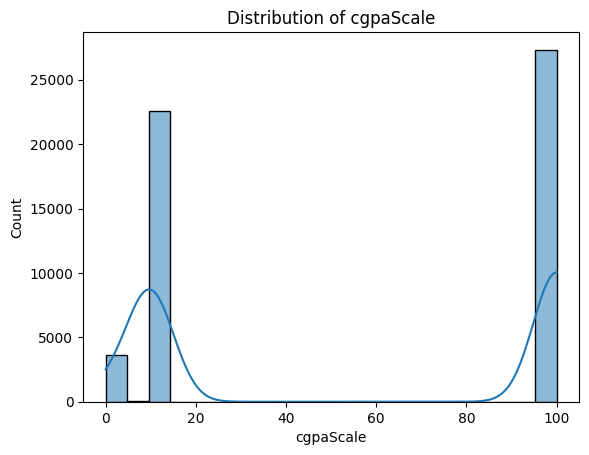

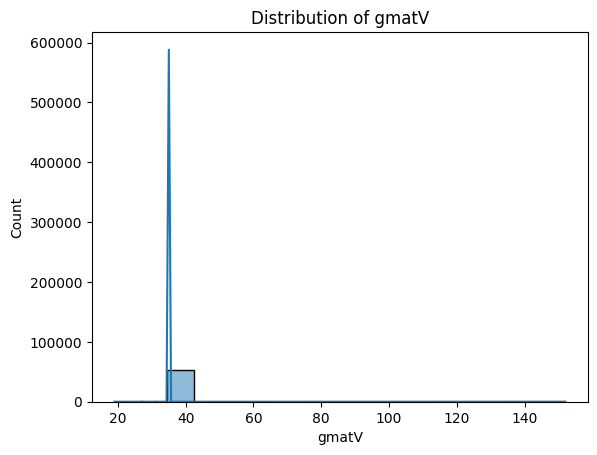

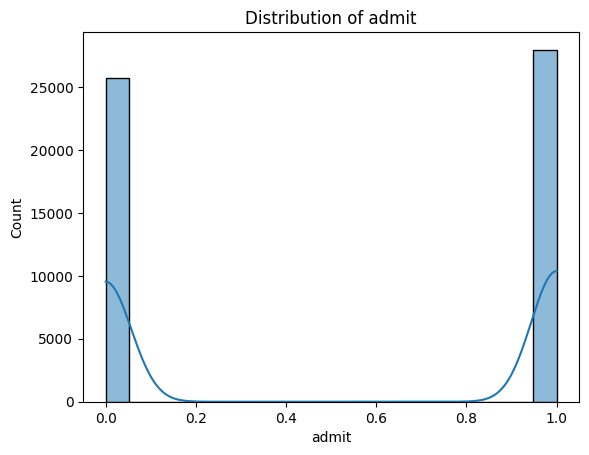

In [486]:

num_cols = order.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure()
    sns.histplot(order[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Pre-Processing Data

In [487]:
# split the data into training data and Testing data

order_train_lr, order_test_lr = train_test_split(order, test_size=.2)

In [488]:
order.admit.value_counts()

admit
1    27955
0    25689
Name: count, dtype: int64

In [489]:
order_train_x = order_train_lr.iloc[:,:-1]
order_train_y = order_train_lr.iloc[:,-1]

In [490]:
order_test_x = order_test_lr.iloc[:,:-1]
order_test_y = order_test_lr.iloc[:,-1]

# Logistic Regression

In [491]:

LR_model = LogisticRegression()

In [492]:
LR_model.fit(order_train_x, order_train_y)

LogisticRegression()

In [493]:
LR_pred = LR_model.predict(order_test_x)

In [494]:
LR_matrix = confusion_matrix(order_test_y, LR_pred)

In [495]:
accuracy_score(order_test_y, LR_pred)

0.5511231242427067

In [496]:
recall_score(order_test_y, LR_pred)

0.6545132743362831

In [497]:
precision_score(order_test_y, LR_pred)

0.563547698872295

In [498]:
f1_score(order_test_y, LR_pred)

0.6056338028169014

In [499]:
print(classification_report(order_test_y, LR_pred))

              precision    recall  f1-score   support

           0       0.53      0.44      0.48      5079
           1       0.56      0.65      0.61      5650

    accuracy                           0.55     10729
   macro avg       0.55      0.55      0.54     10729
weighted avg       0.55      0.55      0.55     10729



In [500]:
LR_matrix1 = pd.DataFrame(LR_matrix)
LR_matrix1.columns = ['No', 'Yes']
LR_matrix1.index=['No', 'Yes']
LR_matrix1

No   Yes
No   2215  2864
Yes  1952  3698

In [501]:
LR_pred_prob_test = LR_model.predict_proba(order_test_x)
len(LR_pred_prob_test)

10729

In [502]:
roc_auc_score(order_test_y, LR_pred_prob_test[:,1]) # Area under the curve the value
LR_fpr, LR_tpr, LR_thre = roc_curve(order_test_y, LR_pred_prob_test[:, 1])

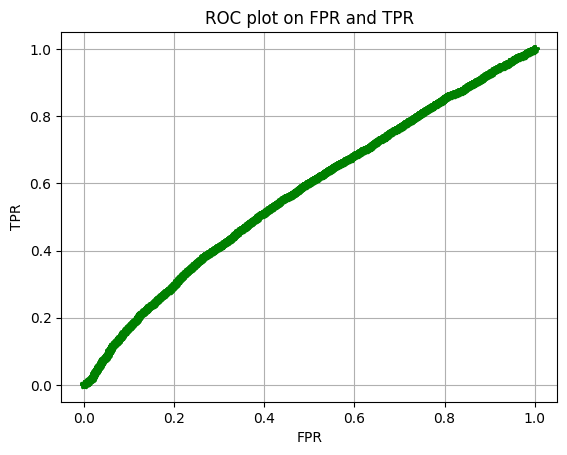

In [503]:
# plot a graph

plt.plot(LR_fpr, LR_tpr, marker="*", color="green")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC plot on FPR and TPR")
plt.grid()

# GRID Search for Logistic Regression

In [504]:
search_LR = {'penalty':['l1','l2',None],
              'C':[0.01, 0.1, 1, 10],
              'solver':['liblinear', 'sage'],
              'max_iter':[100, 300]}

In [505]:
LR_model_grid = LogisticRegression()
LR_grid = GridSearchCV(LR_model_grid, param_grid= search_LR)

In [506]:
LR_grid.fit(order_train_x, order_train_y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 300],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'sage']})

In [507]:
LR_grid.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [508]:
LR_grid.best_score_

0.5570779447745544

# PCA for logistic regression

In [509]:
order1 = order

In [510]:
Logi_order = order1

In [511]:
order1= order1.drop(['admit'], axis=1)
scaler = StandardScaler()
pca = PCA()
scaler = scaler.fit_transform(order1)
x_pca1 = pca.fit_transform(scaler)

In [512]:
l1 = list(pca.explained_variance_ratio_)
pca.explained_variance_ratio_

array([0.11526881, 0.09412986, 0.08342354, 0.06338805, 0.05236285,
       0.04600281, 0.04337446, 0.04052896, 0.04016747, 0.03980834,
       0.03940296, 0.03854978, 0.03788497, 0.03579802, 0.03431182,
       0.03307195, 0.03155996, 0.03030873, 0.02823997, 0.027586  ,
       0.02254193, 0.01169071, 0.00443524, 0.00396817, 0.00219464])

In [513]:
pca.explained_variance_ratio_.sum()

1.0

In [514]:
np.sum(l1[0:55])

1.0

In [515]:
df = pd.DataFrame(x_pca1[:,0:55])

In [516]:
logi_pca = LogisticRegression()
logi_pca.fit(df, Logi_order.admit)

LogisticRegression()

In [517]:
logi_pca.score(logi_df, Logi_order.admit)

0.5567817463276414

# Decision Tree

In [518]:
# split the originl dataset again to train

order_train_dt, order_test_dt = train_test_split(order, test_size=.2)

In [519]:
order_train_dt_x = order_train_dt.iloc[:,:-1]
order_train_dt_y = order_train_dt.iloc[:,-1]

In [520]:
order_test_dt_x = order_test_dt.iloc[:,:-1]
order_test_dt_y = order_test_dt.iloc[:,-1]

In [521]:
# Decision Tree
DT_model = DecisionTreeClassifier()

In [522]:
DT_model.fit(order_train_dt_x, order_train_dt_y)

DecisionTreeClassifier()

In [523]:
DT_pred = DT_model.predict(order_test_dt_x)

In [524]:
DT_matrix =confusion_matrix(order_test_dt_y, DT_pred)

In [525]:
accuracy_score(order_test_dt_y, DT_pred)

0.6565383539938484

In [526]:
precision_score(order_test_dt_y, DT_pred)

0.6738189686260367

In [527]:
recall_score(order_test_dt_y, DT_pred)

0.6657758774274006

In [528]:
f1_score(order_test_dt_y, DT_pred)

0.6697732771753742

In [529]:
print(classification_report(order_test_dt_y, DT_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      5116
           1       0.67      0.67      0.67      5613

    accuracy                           0.66     10729
   macro avg       0.66      0.66      0.66     10729
weighted avg       0.66      0.66      0.66     10729



In [530]:
DT_matrix1 = pd.DataFrame(DT_matrix)
DT_matrix1.columns = ['No', 'Yes']
DT_matrix1.index=['No', 'Yes']
DT_matrix1

No   Yes
No   3307  1809
Yes  1876  3737

In [531]:
DT_pred_prob_test = DT_model.predict_proba(order_test_dt_x)
len(DT_pred_prob_test)

10729

In [532]:
roc_auc_score(order_test_dt_y, DT_pred_prob_test[:,1]) # Area under the curve the value
DT_fpr, DT_tpr, DT_thre = roc_curve(order_test_dt_y, DT_pred_prob_test[:, 1])
# plot a graph

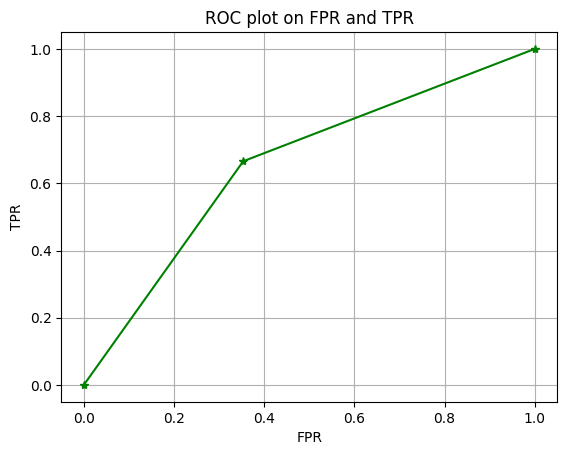

In [533]:
plt.plot(DT_fpr, DT_tpr, marker="*", color="green")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC plot on FPR and TPR")
plt.grid()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0764744 to fit



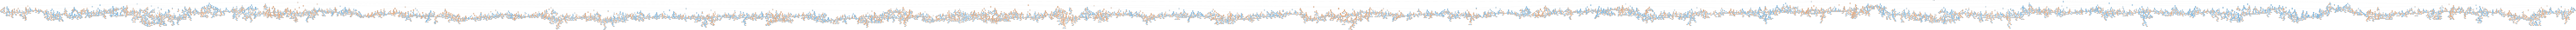

<Figure size 1200x1200 with 0 Axes>

In [534]:
# visualize a Decision Tree

dot_data = StringIO()

DT_fig = plt.figure(figsize=(12,12))

export_graphviz(DT_model, out_file= dot_data, filled= True, rounded= True,
                special_characters= True, feature_names= order_train_dt_x.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Grid Search For Decision Tree

In [535]:
search_DT = {'criterion':['gini','entropy'],
            'max_depth': range(4,9),
            'min_samples_split':[50,75,100]}

In [536]:
DT_model_grid = DecisionTreeClassifier()
DT_grid = GridSearchCV(DT_model, param_grid=search_DT)

In [537]:
DT_grid.fit(order_train_dt_x, order_train_dt_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [50, 75, 100]})

In [538]:
DT_grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 75}

In [539]:
DT_grid.best_score_

0.6446929977863218

# PCA for decision Tree

In [540]:
dt_order = order
dt_pca = DecisionTreeClassifier()
dt_pca.fit(df, dt_order.admit)


DecisionTreeClassifier()

In [541]:
dt_pca.score(df, dt_order.admit)

1.0

# Random Forest

In [542]:
order_train_rf, order_test_rf = train_test_split(order, test_size=.2)

In [543]:
order_train_rf_x = order_train_rf.iloc[:,:-1]
order_train_rf_y = order_train_rf.iloc[:,-1]

In [544]:
order_test_rf_x = order_test_rf.iloc[:,:-1]
order_test_rf_y = order_test_rf.iloc[:,-1]

In [545]:
RF_model = RandomForestClassifier()

In [546]:
RF_model.fit(order_train_rf_x, order_train_rf_y)

RandomForestClassifier()

In [547]:
RF_pred = RF_model.predict(order_test_rf_x)

In [548]:
confusion_matrix(order_test_rf_y, RF_pred)

array([[3107, 2043],
       [2004, 3575]], dtype=int64)

In [549]:
accuracy_score(order_test_rf_y, RF_pred)

0.6227980240469755

In [550]:
precision_score(order_test_rf_y, RF_pred)

0.6363474546101816

In [551]:
recall_score(order_test_rf_y, RF_pred)

0.6407958415486646

In [552]:
f1_score(order_test_rf_y, RF_pred)

0.6385639010449228

In [553]:
print(classification_report(order_test_rf_y, RF_pred))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61      5150
           1       0.64      0.64      0.64      5579

    accuracy                           0.62     10729
   macro avg       0.62      0.62      0.62     10729
weighted avg       0.62      0.62      0.62     10729



In [554]:
RF_pred_prob_test = RF_model.predict_proba(order_test_rf_x)

In [555]:
rf_fpr, rf_tpr, rf_thr = roc_curve(order_test_rf_y, RF_pred_prob_test[:,1])

Text(0.5, 1.0, 'arouc curve')

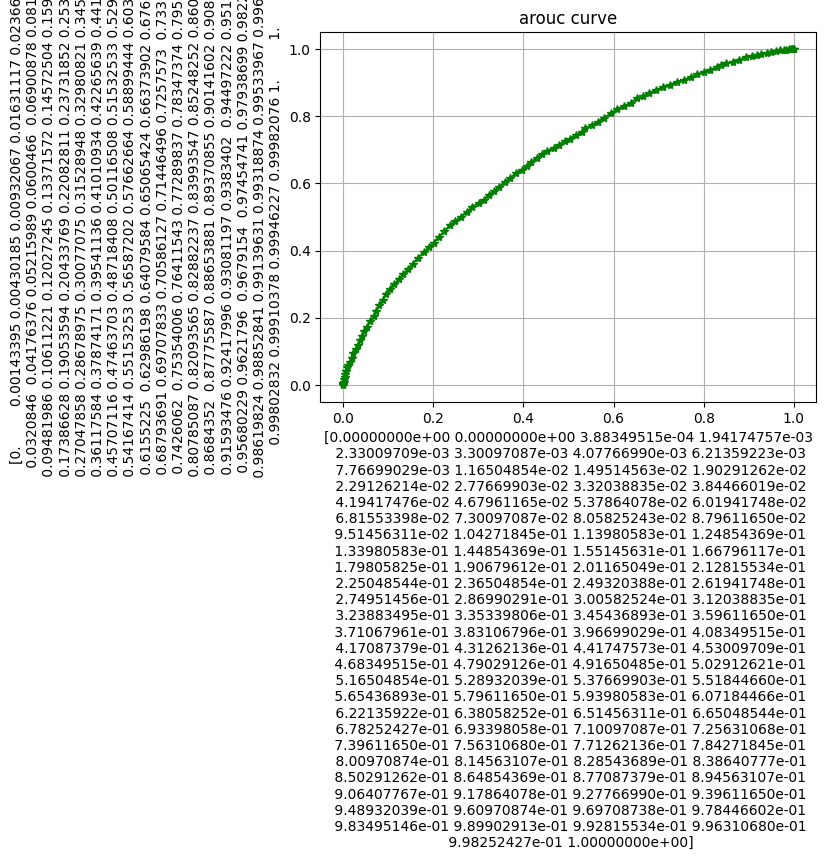

In [556]:
plt.plot(rf_fpr,rf_tpr,marker='*',color='green')
plt.xlabel(rf_fpr)
plt.ylabel(rf_tpr)
plt.grid()
plt.title('arouc curve')

# Grid Search for Random Forest

In [557]:
search_RF = {'n_estimators':[2,5,10,15,20,25],
            'criterion':['gini', 'entropy'],
            'max_depth':range(4,9),
            'min_samples_split':[50,75,100]}

In [558]:
RF_model_grid = RandomForestClassifier()
RF_grid = GridSearchCV(RF_model_grid, param_grid=search_RF, cv=5, scoring="f1_macro")

In [559]:
RF_grid.fit(order_train_rf_x, order_train_rf_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [50, 75, 100],
                         'n_estimators': [2, 5, 10, 15, 20, 25]},
             scoring='f1_macro')

In [560]:
RF_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 50,
 'n_estimators': 20}

In [561]:
RF_grid.best_score_

0.6293149588867777

# PCA for Random Forest

In [562]:
rf_order = order
rf_pca = RandomForestClassifier()
rf_pca.fit(df, dt_order.admit)

RandomForestClassifier()

In [563]:
rf_pca.score(df, dt_order.admit)

0.9999627171724703

# KNN

In [564]:
# KNN
order_train_knn, order_test_knn = train_test_split(order, test_size=.2)

In [565]:
order_train_knn_x = order_train_knn.iloc[:,:-1]
order_train_knn_y = order_train_knn.iloc[:,-1]

In [566]:
order_test_knn_x = order_test_knn.iloc[:,:-1]
order_test_knn_y = order_test_knn.iloc[:,-1]

In [567]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)

In [568]:
knn_model.fit(order_train_knn_x,order_train_knn_y)

KNeighborsClassifier(n_neighbors=7)

In [569]:
pred_knn = knn_model.predict(order_test_knn_x)

In [570]:
confusion_matrix(order_test_knn_y, pred_knn)

array([[2835, 2337],
       [2508, 3049]], dtype=int64)

In [571]:
accuracy_score(order_test_knn_y, pred_knn)

0.5484201696337031

In [572]:
precision_score(order_test_knn_y, pred_knn)

0.5660972892684738

In [573]:
recall_score(order_test_knn_y, pred_knn)

0.5486773438905884

In [574]:
f1_score(order_test_knn_y, pred_knn)

0.5572512108197021

In [575]:
print(classification_report(order_test_knn_y, pred_knn))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54      5172
           1       0.57      0.55      0.56      5557

    accuracy                           0.55     10729
   macro avg       0.55      0.55      0.55     10729
weighted avg       0.55      0.55      0.55     10729



In [576]:
l1=[]
for k in range(1,100):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(order_train_knn_x,order_train_knn_y)
    pred_knn=knn_model.predict(order_test_knn_x)
    tab_knn=confusion_matrix(order_test_knn_y,pred_knn)
    acc=accuracy_score(order_test_knn_y,pred_knn)
    l1.append(acc)

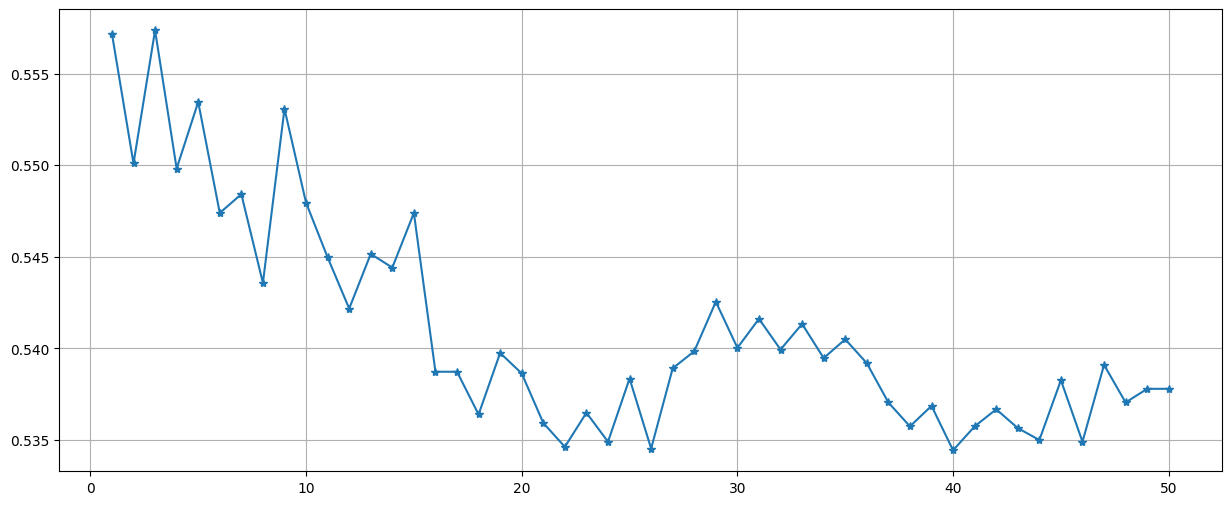

In [577]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1, 51)), l1[:50], marker='*')
plt.grid()

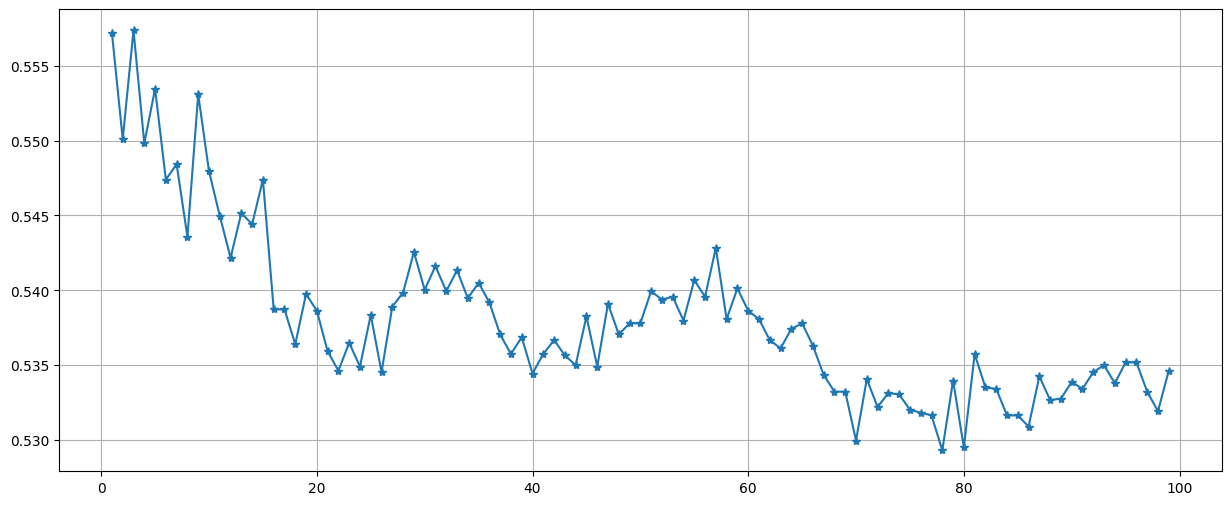

In [578]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,100)), l1, marker='*')
plt.grid()

# Grid search

In [579]:
search_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]    # for minkowski
}

In [580]:
knn_model_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model_grid, param_grid= search_knn)

In [581]:
knn_grid.fit(order_train_knn_x,order_train_knn_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [582]:
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

In [583]:
knn_grid.best_score_

0.5585925667016195

# PCA for KNN

In [584]:
knn_order = order
knn_pca = KNeighborsClassifier()
knn_pca.fit(df, dt_order.admit)

KNeighborsClassifier()

In [585]:
knn_pca.score(df, dt_order.admit)

0.7260644247259712

# Model Comparison

In [586]:
col_1 = ("Logistic Regression","Decision Tree", "Random Forest", "KNN")
col_2 = (55.11,65.65,62.27,54.84)
col_3 = (55.70, 64.5, 63, 55.85)
col_4 = (55.67, 100, 99.99, 72.60)

In [587]:
models_accuracy = pd.DataFrame()
models_accuracy['Model'] = col_1
models_accuracy['Accuracy'] = col_2
models_accuracy['Grid Search'] = col_3
models_accuracy['PCA'] = col_4

In [588]:
models_accuracy

Model  Accuracy  Grid Search     PCA
0  Logistic Regression     55.11        55.70   55.67
1        Decision Tree     65.65        64.50  100.00
2        Random Forest     62.27        63.00   99.99
3                  KNN     54.84        55.85   72.60

# Final Conclusion

* The dataset was analyzed using EDA, revealing key trends in academic scores, experience, and test results that influence student admission outcomes.

* Multiple machine learning models — Logistic Regression, Decision Tree, Random Forest, and KNN — were trained and optimized using Grid Search to improve performance.

* Among all models, Random Forest achieved the highest accuracy, while Logistic Regression provided stable and consistent performance; KNN performed the weakest.

* PCA helped reduce dimensionality and provided insight into variance distribution, supporting better understanding of feature contributions.